# Assignment 6 - Weather

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


Plot:

-The temperature
-The mean temperature each day
-The mean temperature for each month
-60% of the marks will be given for the above

For the last 40%

Plot:

-The Windspeed (there is data missing from this column)
-The rolling windspeed (say over 24 hours)
-The max windspeed for each day
-The monthly mean of the daily max windspeeds (yer I am being nasty here)

In [1]:
# Import Pandas library to load the data.
import pandas as pd

In [2]:
# Load DataFrame.
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23) # The first column starts in line 24.

# Check the first 3 rows.
df.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_15720\2934260067.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23) # The first column starts in line 24.


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [3]:
# Import datetime to treat the column "date" as datetime object.
import datetime
df["date"]= pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

In [4]:
# Check if date is now a datetime object.
df["date"]

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
246925   2024-09-30 20:00:00
246926   2024-09-30 21:00:00
246927   2024-09-30 22:00:00
246928   2024-09-30 23:00:00
246929   2024-10-01 00:00:00
Name: date, Length: 246930, dtype: datetime64[ns]

In [5]:
# Import seaborn to plot.
import seaborn as sns

<Axes: xlabel='date', ylabel='temp'>

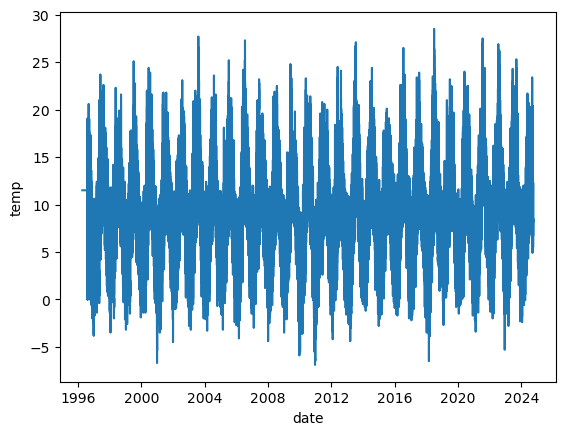

In [6]:
# Plot temperature along the time.
sns.lineplot(data=df, x="date", y="temp")

In [7]:
# Temperature mean in all the data.
df["temp"].mean()

8.763200097193534

In [8]:
# Calculate the mean temperature for each day.
days= df["date"].dt.strftime("%Y-%m-%d")
daily_mean_temp = df.groupby(days)["temp"].transform("mean")

# Create a new column in the original DataFrame.
df["daily_mean_temp"] = daily_mean_temp

# Check.
df.head(3)

# # https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html
# https://realpython.com/pandas-groupby/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html
# https://pandas.pydata.org/docs/user_guide/groupby.html#the-transform-method

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt,daily_mean_temp
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,25,81,0.0,35000,32,5,11.50
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,25,82,0.0,40000,45,5,12.65
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,80,81,0.0,8000,32,7,12.65


<Axes: xlabel='date', ylabel='daily_mean_temp'>

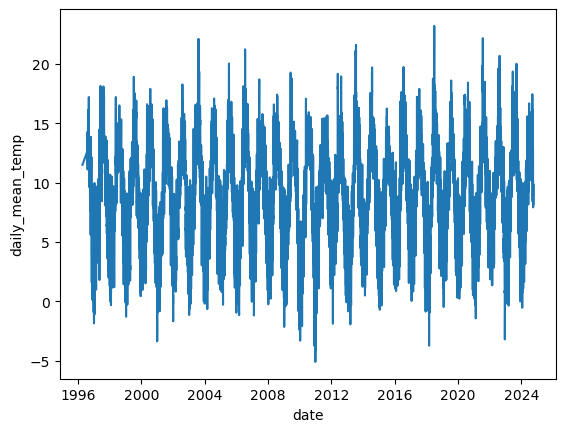

In [9]:
# Plot.
sns.lineplot(data=df, x="date", y="daily_mean_temp")

In [22]:
# Calculate the mean temperature for each month.
months= df["date"].dt.strftime("%Y-%m")
monthly_mean_temp = df.groupby(months)["temp"].transform("mean")

# Create a new column with the monthly mean temperatures.
df["monthly_mean_temp"] = monthly_mean_temp

# check.
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp,daily_mean_wind,daily_max_wind,monthly_mean_max_wind
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,81,0.0,35000,32,5,11.50,11.50,0.0,0.0,0.0
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,82,0.0,40000,45,5,12.65,12.65,0.0,0.0,0.0
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,81,0.0,8000,32,7,12.65,12.65,0.0,0.0,0.0


<Axes: xlabel='date', ylabel='monthly_mean_temp'>

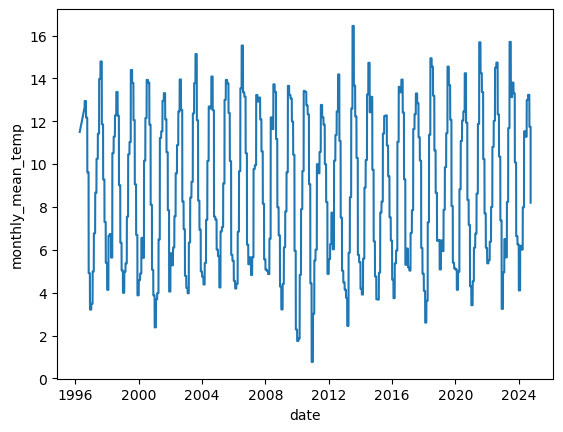

In [11]:
# Plot.
sns.lineplot(data=df, x="date", y="monthly_mean_temp")

In [12]:
### Wind speed.
# Drop the empty values.
df.dropna(subset=['wdsp'], inplace=True)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [13]:
# Change the dtype so it will tackle the "TypeError: 'value' must be an instance of str or bytes, not a int".
df["wdsp"] = pd.to_numeric(df["wdsp"], errors="coerce")
df["wdsp"].head(3)

# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# https://stackoverflow.com/questions/64890665/how-do-i-fix-this-type-error-value-must-be-an-instance-of-str-or-bytes-not-a#comment114730210_64890983

0    0.0
1    0.0
2    0.0
Name: wdsp, dtype: float64

<Axes: xlabel='date', ylabel='wdsp'>

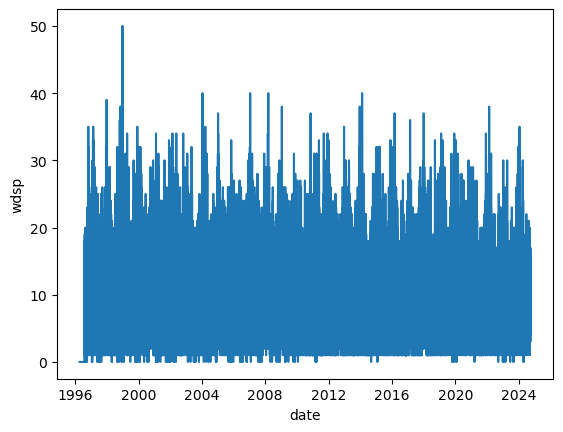

In [14]:
# Plot.
sns.lineplot(data=df, x="date", y="wdsp")

In [15]:
# Calculate the daily wind speed mean.
daily_mean_wind = df.groupby(days)["wdsp"].transform("mean")

# Create a new column and check
df["daily_mean_wind"] = daily_mean_wind
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,wddir,ww,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp,daily_mean_wind
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,25,81,0.0,35000,32,5,11.50,11.50,0.0
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,25,82,0.0,40000,45,5,12.65,12.65,0.0
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,80,81,0.0,8000,32,7,12.65,12.65,0.0


<Axes: xlabel='date', ylabel='daily_mean_wind'>

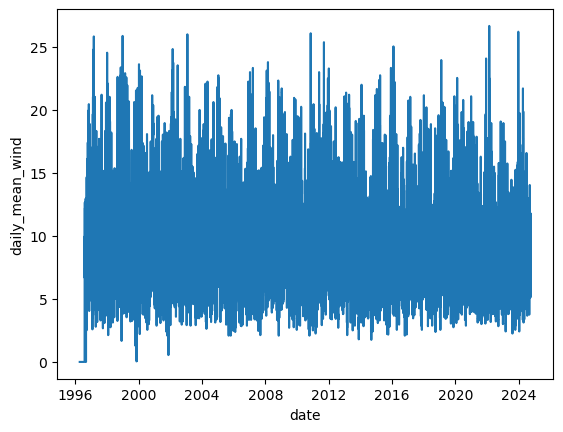

In [16]:
sns.lineplot(data=df, x="date", y="daily_mean_wind")

In [17]:
# Calculate the daily maximum wind speed.
daily_mean_wind = df.groupby(days)["wdsp"].transform("max")

# Create a new column and show.
df["daily_max_wind"] = daily_mean_wind
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ww,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp,daily_mean_wind,daily_max_wind
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,25,81,0.0,35000,32,5,11.50,11.50,0.0,0.0
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,25,82,0.0,40000,45,5,12.65,12.65,0.0,0.0
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,80,81,0.0,8000,32,7,12.65,12.65,0.0,0.0


<Axes: xlabel='date', ylabel='daily_max_wind'>

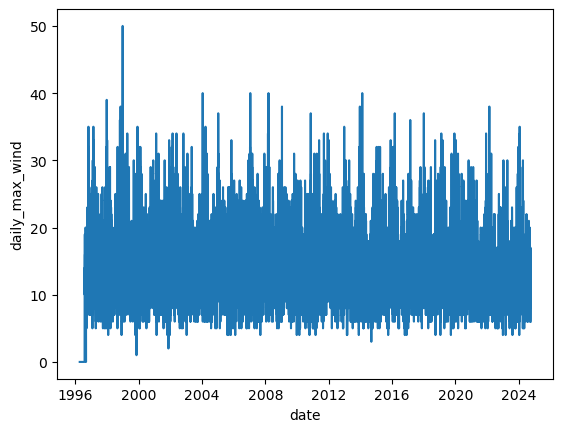

In [18]:
sns.lineplot(data=df, x="date", y="daily_max_wind")

In [19]:
# Calculate the monthly mean of the daily maximum wind speeds. 
monthly_mean_max_wdsp = df.groupby(months)["daily_max_wind"].transform("mean")

# Create a new column and check.
df["monthly_mean_max_wind"] = monthly_mean_max_wdsp
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp,daily_mean_wind,daily_max_wind,monthly_mean_max_wind
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,81,0.0,35000,32,5,11.50,11.50,0.0,0.0,0.0
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,82,0.0,40000,45,5,12.65,12.65,0.0,0.0,0.0
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,81,0.0,8000,32,7,12.65,12.65,0.0,0.0,0.0


<Axes: xlabel='date', ylabel='monthly_mean_max_wind'>

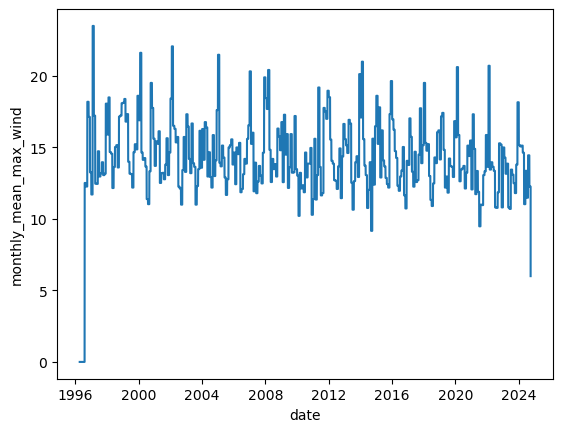

In [20]:
sns.lineplot(data=df, x="date", y="monthly_mean_max_wind")

In [21]:
# Analyse all the new data generated.
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,w,sun,vis,clht,clamt,daily_mean_temp,monthly_mean_temp,daily_mean_wind,daily_max_wind,monthly_mean_max_wind
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,81,0.0,35000,32,5,11.500000,11.500000,0.000000,0.0,0.000000
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,82,0.0,40000,45,5,12.650000,12.650000,0.000000,0.0,0.000000
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,81,0.0,8000,32,7,12.650000,12.650000,0.000000,0.0,0.000000
3,1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,82,0.0,28000,35,6,12.650000,12.650000,0.000000,0.0,0.000000
4,1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,11,0.0,40000,40,6,12.650000,12.650000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246925,2024-09-30 20:00:00,0,1.1,0,9.5,0,9.4,9.2,11.7,99,...,,0.0,,0,8,9.891667,11.741389,7.291667,12.0,12.266667
246926,2024-09-30 21:00:00,0,0.0,0,8.6,0,8.6,8.6,11.2,100,...,,0.0,,0,8,9.891667,11.741389,7.291667,12.0,12.266667
246927,2024-09-30 22:00:00,0,0.1,0,8.5,0,8.4,8.2,10.9,99,...,,0.0,,0,8,9.891667,11.741389,7.291667,12.0,12.266667
246928,2024-09-30 23:00:00,0,0.0,0,8.2,0,8.0,7.8,10.6,97,...,,0.0,,0,8,9.891667,11.741389,7.291667,12.0,12.266667
